Primeras filas:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    in

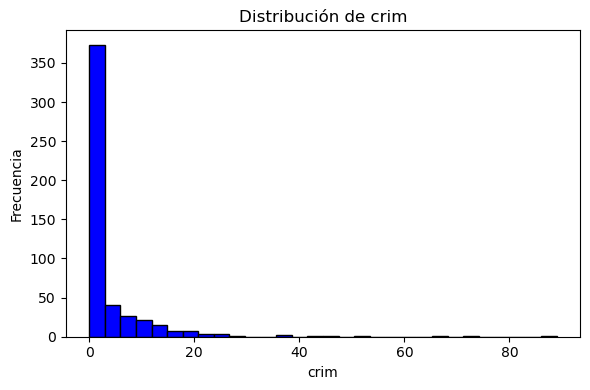

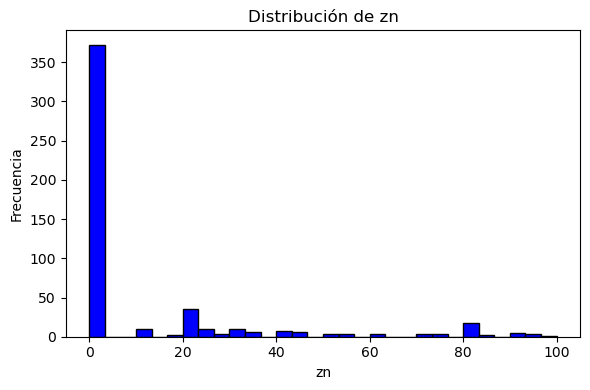

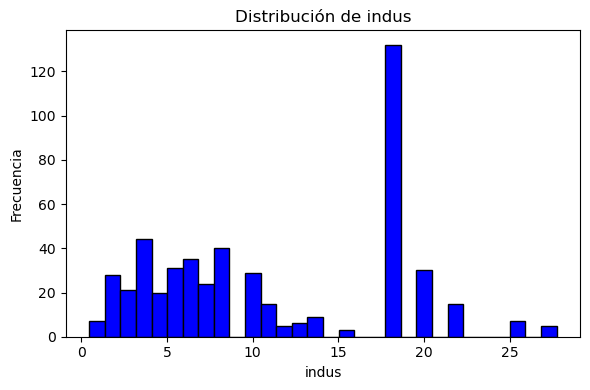

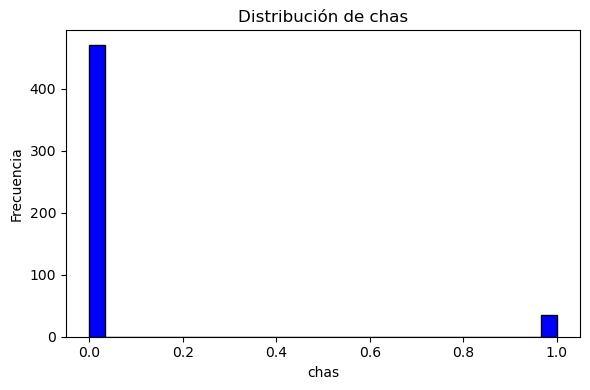

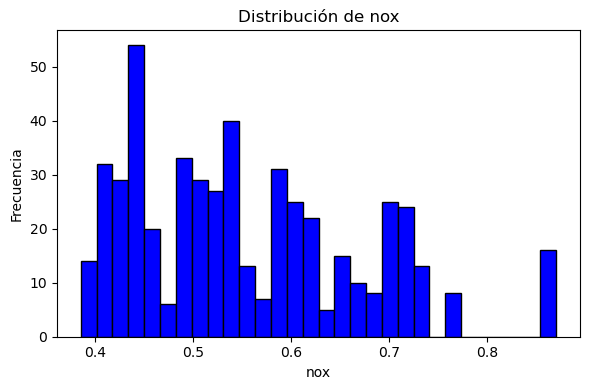

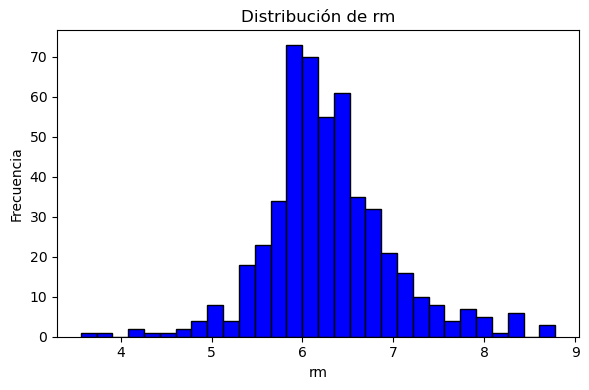

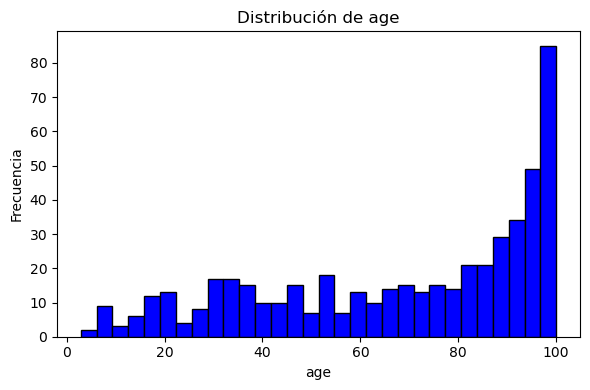

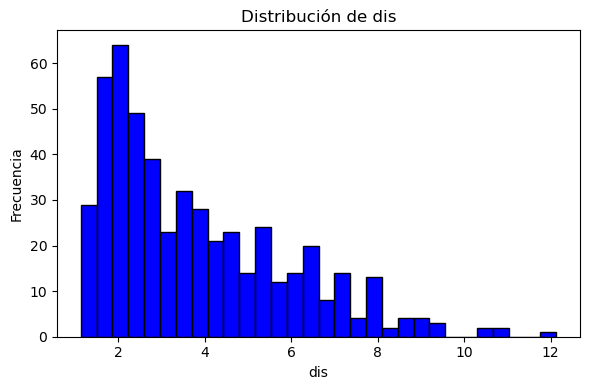

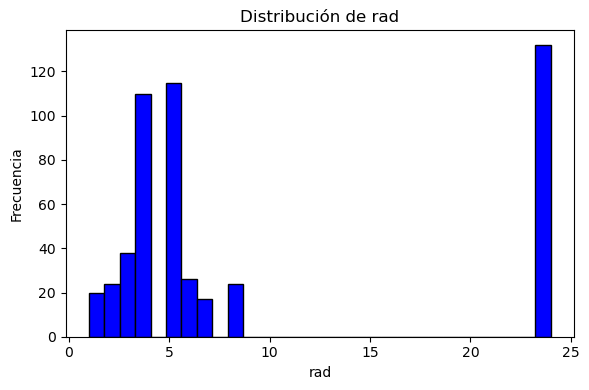

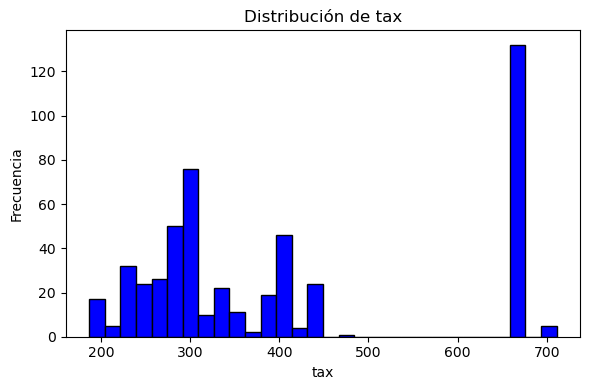

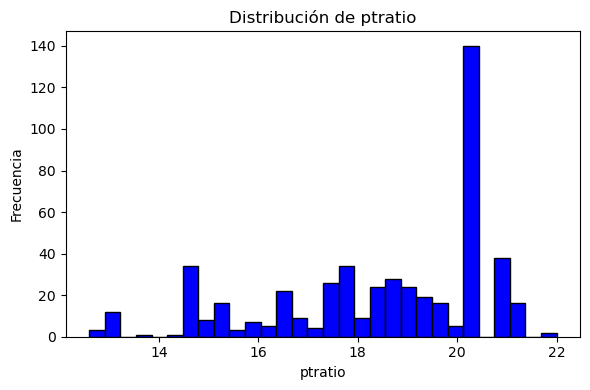

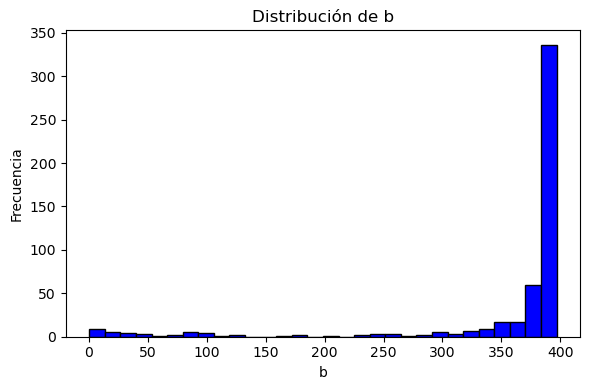

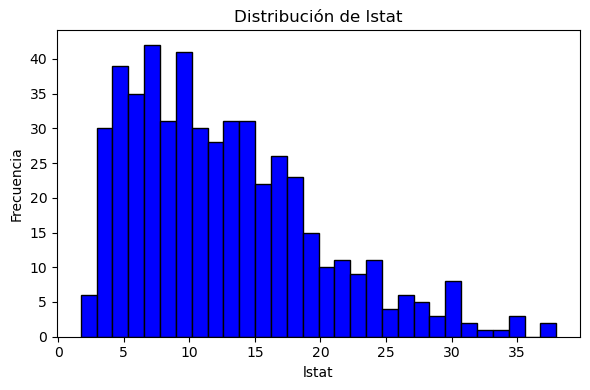

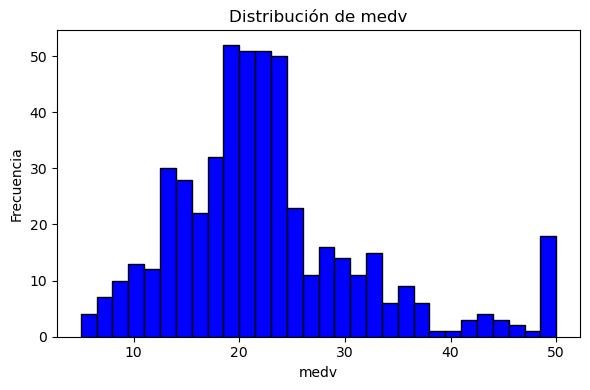

In [4]:
####Tarea 1: Familiarizarse con el conjunto de datos
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print("Primeras filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas básicas:")
print(df.describe())
for col in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [ ]:
~EXPLICACION: crim: esta grafica genera una distribucion sesgada a la mayoria de valores vajos, y
pocos  extremos altos.
zn:grafica sobre la proporcion de s¿zonas residencieales, con mayor dispercion en 0 y algunos valores 
dispersos hasta 100.
indus: proporcion de asides inndustrial. distribucion bimodal con valores entre 5 y 18.
chas: son variables binarias que indican los limites de las viviendas serca del rio charles.
nox:concentracion de oxido de notrogeno, distribucion normal con valores al rededor de 0.5.
rm:numero promedio de habitaciones, distribucion normal cebtrada en 6.
age:proporcion de viviendas antiguas, con valores altos de mas de 90.
dis:distancia a centros de empleo, con cercania de 2-5.
rad:indice de accesibilidad a autopistas, valores discretos con pico de 24.
tax:tasa de impuesto a la propiedad con valores centrados en 300 y 400.
ptratio:proporcion alumno-maestro, mayoria de 17-20.
black:proporcion de de afrodecendientes con valores cerca de 390.
istat:porcentaje de poblacion pobre con valores entre menores de 20 y mayores de 30.
medv: precio mediano de viviendas en miles, con distribucion normal entre 22.~

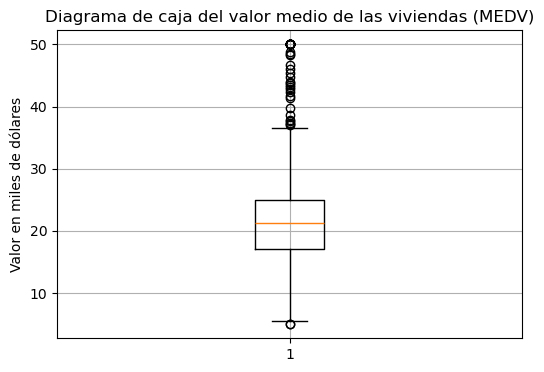

In [14]:
###Tarea 2: Generar estadísticas descriptivas y visualizaciones
####Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)
import pandas as pd
import matplotlib.pyplot as plt

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
plt.figure(figsize=(6, 4))
plt.boxplot(boston_df["MEDV"])
plt.title("Diagrama de caja del valor medio de las viviendas (MEDV)")
plt.ylabel("Valor en miles de dólares")
plt.grid(True)
plt.show()

In [ ]:
~En el diagrama de box-plt se muestra el valor mediano de las viviendas en boston
, este tienen una mediana de  21-22 mmil dolares, con el 50% central de los datos entre
17 y 25 mil dolares. La distribucion presenta un ligero sesgo hacia valores bajos y varias ourliers 
por encima de 35 mi dolares, esto indica la presencia de algunas viviendas con precios altamente elevados. 
Esta distribucion de precios ayuda a identificar valores atipicos relevantes para modelos predictivos.~

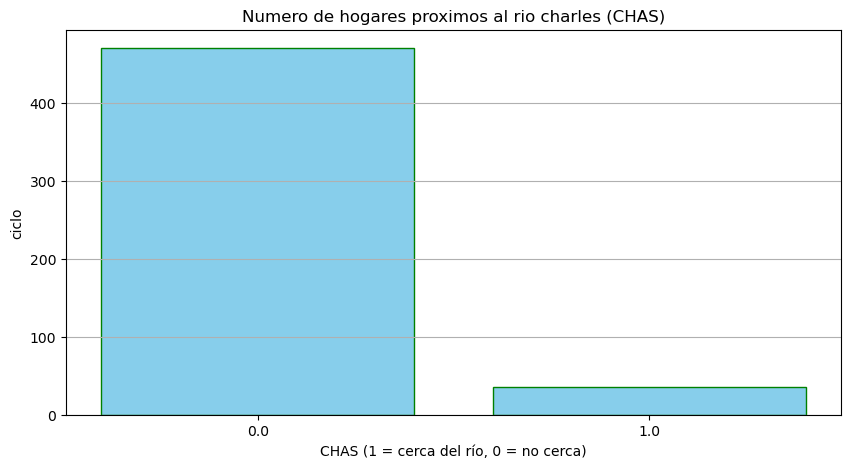

In [15]:
####Proporcione un diagrama de barras para la variable "río Charles
import pandas as pd
import matplotlib.pyplot as plt

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
chas_counts = boston_df["CHAS"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(chas_counts.index.astype(str), chas_counts.values, color="skyblue", edgecolor="green")
plt.title("Numero de hogares proximos al rio charles (CHAS)")
plt.xlabel("CHAS (1 = cerca del río, 0 = no cerca)")
plt.ylabel("ciclo")
plt.grid(True, axis='y')
plt.show()

In [ ]:
~En esta grafica se muestra que la gran mayoria de viviendas en boston no estan cerca
cerca del rio charles, mientras que muy pocas tienen una ubicacion priviligiada, lo que sugiere que las 
propiedades ribereñas son escasas y posiblemente mas caras.~

In [ ]:

####Proporcione un boxplot para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres
# grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

<Figure size 600x400 with 0 Axes>

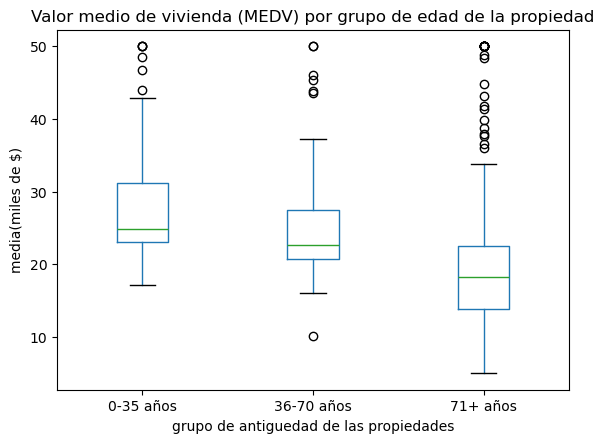

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
def clasificar_edad(edad):
    if edad <= 35:
        return "0-35 años"
    elif edad <= 70:
        return "36-70 años"
    else:
        return "71+ años"
boston_df["grupo_edad"] = boston_df["AGE"].apply(clasificar_edad)
plt.figure(figsize=(6, 4))
boston_df.boxplot(column="MEDV", by="grupo_edad", grid=False)
plt.title("Valor medio de vivienda (MEDV) por grupo de edad de la propiedad")
plt.suptitle("")
plt.xlabel("grupo de antiguedad de las propiedades")
plt.ylabel("media(miles de $)")
plt.show()

In [ ]:
~Esta grafica compara los valores de las viviendas segun su antiguedad:las propiedades mas nuevas 
son de entre 0 y 35 años y estas tienen un valor mas elevado, mientras que las mas antiguas que 
tienen mas de 70 años muestran valores mas bajos, estos datos sugieren que la antiguedad 
de las viviendas afectan sus precios~

In [ ]:
####Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y
# la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?

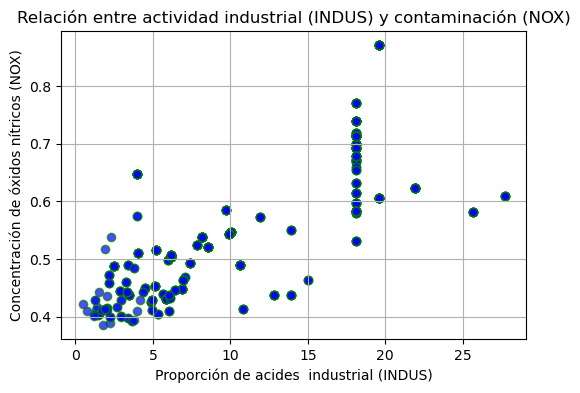

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
plt.figure(figsize=(6, 4))
plt.scatter(boston_df["INDUS"], boston_df["NOX"], alpha=0.7, color="blue", edgecolors="g")
plt.title("Relación entre actividad industrial (INDUS) y contaminación (NOX)")
plt.xlabel("Proporción de acides  industrial (INDUS)")
plt.ylabel("Concentración de óxidos nítricos (NOX)")
plt.grid(True)
plt.show()

In [ ]:
~Esta grafica de dispercion revela una relacion clara, a mayor proporcion de zonas
industriales con mayor concentracion de contaminantes. Los puntos se agrupan en una
tendencia ascendente, mostrando que las areas con mas industroias tienen un nivel de contaminacion 
mayor, mientas que las que tiene pocas industrias poseen bajos niveles de contaminacion. Esto
corfirma el impacto que tienen las industrias en la calidad de aire o terrenos.~

In [ ]:
####Cree un histograma para la variable proporción de alumnos por profesor

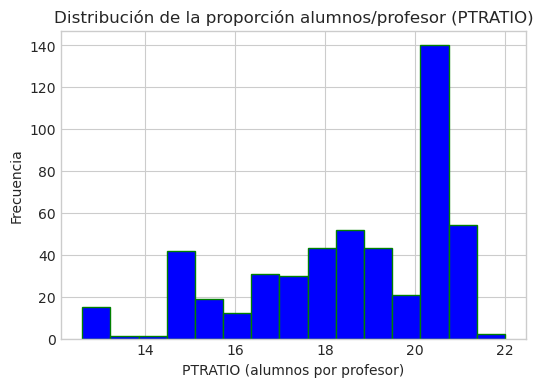

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
plt.figure(figsize=(6, 4))
plt.hist(boston_df["PTRATIO"], bins=15, color="blue", edgecolor="green")
plt.title("Distribución de la proporción alumnos/profesor (PTRATIO)")
plt.xlabel("PTRATIO (alumnos por profesor)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


In [ ]:
~El histograna muestra la distribucion de la proporcion alumnos-profesor en boston.
La mayoria de las zonas tienen entre 16 y 18 estudiantes por maestros con muy 
pocas areas por encima de 20.~

In [ ]:
###Tarea 3: Utilice las pruebas adecuadas para responder a las preguntas que se le plantean

In [ ]:
####prueba T

In [35]:
import pandas as pd
from scipy.stats import ttest_ind
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

near_river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
away_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]
t_stat, p_value = ttest_ind(near_river, away_river, equal_var=False)
print(f"p-valor: {p_value:.4f}")

p-valor: 0.0036


In [ ]:
si exixte una significativa en el valor de las casa delimitadas por el rio charles.

In [ ]:
###ANOVA

In [40]:
from scipy.stats import f_oneway
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df["grupo_edad"] = pd.cut(
    boston_df["AGE"],
    bins=[0, 35, 70, 100],
    labels=["0-35 años", "36-70 años", "71+ años"]
)
group_1 = boston_df[boston_df["grupo_edad"] == "0-35 años"]["MEDV"]
group_2 = boston_df[boston_df["grupo_edad"] == "36-70 años"]["MEDV"]
group_3 = boston_df[boston_df["grupo_edad"] == "71+ años"]["MEDV"]
# Prueba ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)
print(f"p-valor: {p_value:.4f}")


p-valor: 0.0000


In [ ]:
no

In [ ]:
###correlacion de personas con NOX y INDUS

In [47]:
import pandas as pd
from scipy.stats import ttest_ind
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
corr, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Coeficiente de correlación: {corr:.3f}, p-valor: {p_value:.4f}")

Coeficiente de correlación: 0.764, p-valor: 0.0000


In [ ]:
si se puede concluir la nula existencia entre las concentraciones de oxido nitrico
y la proporcion de acres comerciales

In [ ]:
###Analisis de relacion

In [49]:
import pandas as pd
from scipy.stats import ttest_ind
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
X = sm.add_constant(boston_df["DIS"])  # Variable independiente
y = boston_df["MEDV"]                  # Variable dependiente
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.21e-08
Time:                        01:25:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
una mayor distancia a los centris de empleo esta asociada con un ligero aumento en el 
valor de las viviendas.